# Assignment 5 - Evaluating environmental impact of your exam portfolio

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

Emissions have been measured through CodeCarbon as kilograms of CO₂-equivalent (CO₂eq). The first part of the notebook compares the emissions for each assignment overall and discusses these results. Afterwards, every assignment is presented and discussed one by one. The discussions are accompanied by csv files and graphs with the emissions for every task included in the assignment. This choice was made because the overall emissions for a single assignment does not reveal anything about which specific tasks have a bigger impact on the level of CO₂eq being emitted. Without looking at the individual tasks, it is hard to suggest improvements to the code.

In [16]:
# loading the csv file with emissions for all assignments

filename = os.path.join("../input/emissions.csv")
emissions = pd.read_csv(filename)
emissions[["project_name", "emissions"]]

,project_name,emissions
0,assignment 1,2.229942e-03
1,assignment 2 vectorizer,6.753162e-08
2,assignment 2 logistic regression,3.588361e-04
3,assignment 2 mlp classifier,2.606866e-04
4,assignment 3,1.475779e-04
5,assignment 4,2.375433e-02


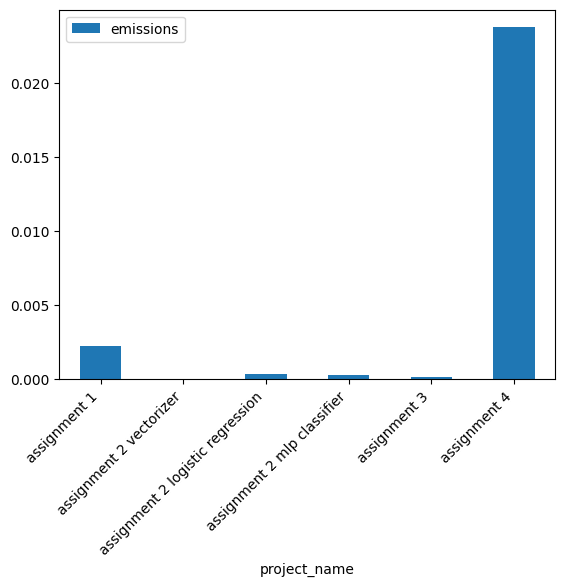

<Figure size 640x480 with 0 Axes>

In [3]:
emissions.plot(x="project_name", y="emissions", kind="bar") 
plt.xticks(rotation=45, ha="right")

plt.savefig('../output/overall_emissions.png') # save output
plt.show()
plt.clf()

##### Discussion of results

Between all 4 assignments, assignment 4 generated by far the most CO₂eq overall. Assignment 1 is next, and while some of the scripts for assignment 2 had less emissions, combining all three means that assignment 2 generated more emissions than assignment 3, which had the lowest number.

Based on these results, Assignment 4 has the largest environment impact. The cause of this and ways to reduce the emissions will be discussed in the later section dedicated to Assignment 4.

Even then, these numbers are only for a single run through the scripts. In reality, while writing and testing the code, each assignment has been run a number of times which multiplies the number of emissions several times. This is also an opportunity for reducing the environmental impact. When writing the code in the first place, one could consider using a smaller dataset while troubleshooting or commenting out heavier tasks when checking if later, less intense tasks are working. By doing so, running the script would hopefully generate less emissions than using the full dataset and code. Additionally, manually looking over the code for easily spotted mistakes such as inconsistent variables or typos means that the code can run succesfully with fewer trial runs.

Following this, we look at every assignment and it's tasks further in depth.

### Assignment 1

In [17]:
# loading the csv file with emissions for assignment 1

filename1 = os.path.join("../input/emissions_base_50058b18-db6c-4568-827d-8e040f6d143b.csv")
assignment1 = pd.read_csv(filename1)
assignment1 = assignment1[["task_name", "emissions"]]
assignment1

,task_name,emissions
0,load model,1.711705e-05
1,create path to dir,9.067828e-09
2,sort directory,1.017750e-08
3,extract features,2.212783e-03


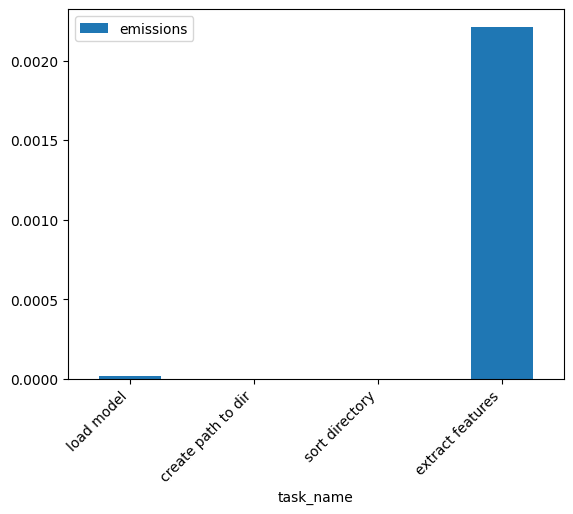

<Figure size 640x480 with 0 Axes>

In [5]:
# creating a visualization of the emissions

assignment1.plot(x="task_name", y="emissions", kind="bar") 
plt.xticks(rotation=45, ha="right")

plt.savefig('../output/Assignment1_emissions.png') # save output
plt.show()
plt.clf()

##### Discussion of results

For the first assignment, extracting linguistic features from the texts is the most demanding task, in terms of emissions. Loading the model also generates a small amount, but this is a necessary step and it is hard to limit the emissions here. Lastly, the simple tasks of navigating and sorting directories are generating a negligible amount of CO₂eq. This will be a general trend throughout all four assignments.

The task named ```extract features``` refers to a for loop which both reads through every file and extracts linguistic features. This includes a counter of various word classes and named entities. Because of the structure, it is hard to pinpoint which part of the task is generating the most CO₂eq. It is also hard to split it up as the loop needs to count several features, and splitting it would require reading the files once per task which would only add to the assignment overall being more intensive. 

### Assignment 2

According to the setup with three separate scripts, this section will also be split up into a dataframe and graph of each script.

In [18]:
# loading the csv file with emissions for assignment 2's vectorizer

filename2vec = os.path.join("../input/emissions_base_cf9f6a2f-ca98-434e-b368-b4189dc2daea.csv")
assignment2vec = pd.read_csv(filename2vec)
assignment2vec[["task_name", "emissions"]]

,task_name,emissions
0,create vectorizer,5.190924e-08


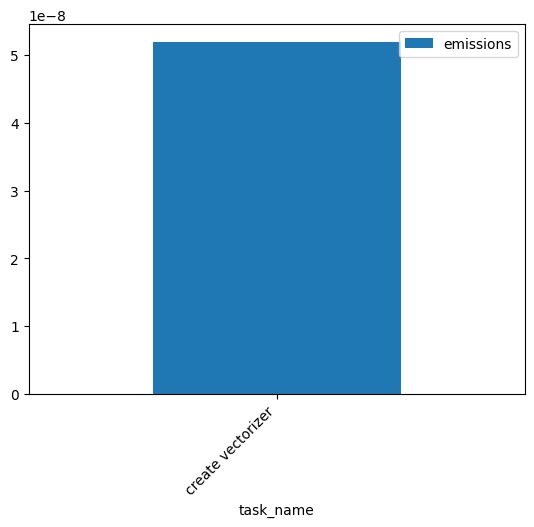

<Figure size 640x480 with 0 Axes>

In [7]:
# creating a visualization of the emissions

assignment2vec.plot(x="task_name", y="emissions", kind="bar") 
plt.xticks(rotation=45, ha="right")

plt.savefig('../output/Assignment2vec_emissions.png') # save output
plt.show()
plt.clf()

In [19]:
# loading the csv file with emissions for assignment 2's logistic regression classifier

filename2logreg = os.path.join("../input/emissions_base_e95cf46e-e345-4a3b-a412-98a463f3c40b.csv")
assignment2logreg = pd.read_csv(filename2logreg)
assignment2logreg[["task_name", "emissions"]]

,task_name,emissions
0,load data,4.220088e-06
1,create data variables,1.363309e-08
2,creating train-test split,3.471797e-08
3,load vectorizer,1.031474e-07
4,fit vectorizer,1.286429e-04
5,fit classifier,6.641122e-07
6,make predictions,5.566042e-08
7,create confusion matrix,5.018858e-07
8,make classification report,3.807966e-07
9,create cross validation graph,2.241312e-04


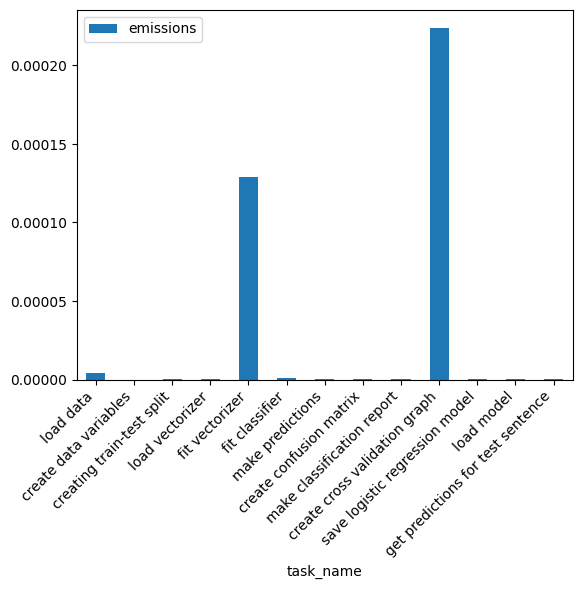

<Figure size 640x480 with 0 Axes>

In [9]:
# creating a visualization of the emissions

assignment2logreg.plot(x="task_name", y="emissions", kind="bar") 
plt.xticks(rotation=45, ha="right")

plt.savefig('../output/Assignment2logreg_emissions.png') # save output
plt.show()
plt.clf()

In [20]:
# loading the csv file with emissions for assignment 2's mlp classifier

filename2mlp = os.path.join("../input/emissions_base_621c7fac-9382-44de-991c-98a4f1b7e6f7.csv")
assignment2mlp = pd.read_csv(filename2mlp)
assignment2mlp[["task_name", "emissions"]]

,task_name,emissions
0,load data,5.518520e-06
1,create data variables,1.070783e-08
2,creating train-test split,2.802172e-08
3,load vectorizer,6.735610e-08
4,fit vectorizer,1.278355e-04
5,fit classifier,1.220718e-04
6,make predictions,8.081489e-08
7,create confusion matrix,4.358929e-06
8,make classification report,5.219123e-07
9,create loss curve graph,1.907991e-08


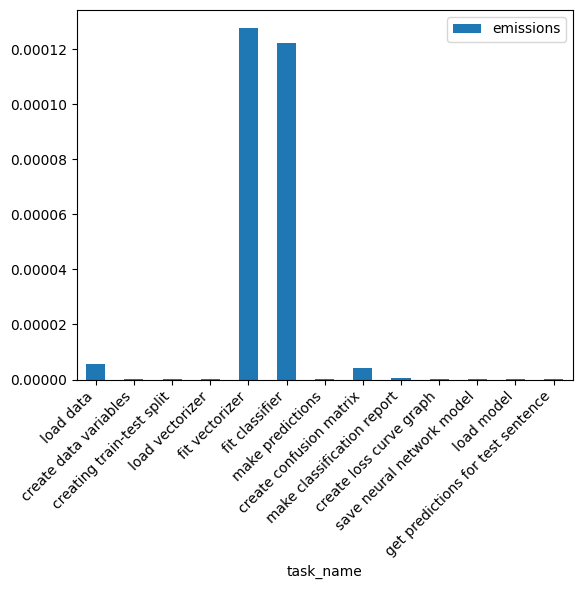

<Figure size 640x480 with 0 Axes>

In [11]:
# creating a visualization of the emissions

assignment2mlp.plot(x="task_name", y="emissions", kind="bar") 
plt.xticks(rotation=45, ha="right")

plt.savefig('../output/Assignment2mlp_emissions.png') # save output
plt.show()
plt.clf()

##### Discussion of results

Between the three scripts, the logistic regression classifier generates the most emissions, followed by the mlp classifier. In comparison, creating the vectorizer generates very little CO₂eq, but nonetheless, having it as a separate script means that it only has to be run once for both classifiers to use it, which reduces overall emissions. 

As for individual tasks, fitting the vectorizer and specifically the mlp classifier also leads to relatively high numbers of CO₂eq being emitted. Up until the classifier fitting, the logistic regression and mlp scripts are identical. To reduce emissions you could either chose to only run one of the classifiers, or you could combine them both in one script and only have to perform the first few stephs of loading the data and fitting the vectorizer once.

The performance visualizations also generate a bit of CO₂eq, even if it is a small amount compared to the aforementioned tasks. As these are just to doublecheck performance and do not actually affect it in any way, they could be left out in any runs that do not include any tweaking of the performance.

### Assignment 3

In [21]:
# loading the csv file with emissions for assignment 3

filename3 = os.path.join("../input/emissions_base_934a5856-cc86-47c1-baec-3334f06ae609.csv")
assignment3 = pd.read_csv(filename3)
assignment3[["task_name", "emissions"]]

,task_name,emissions
0,create arguments,6.633489e-08
1,load data,8.175067e-06
2,load model,1.366316e-04
3,find similar words,2.512998e-06
4,select artist,8.014895e-08
5,counting words,8.266942e-08
6,print results,2.279887e-08


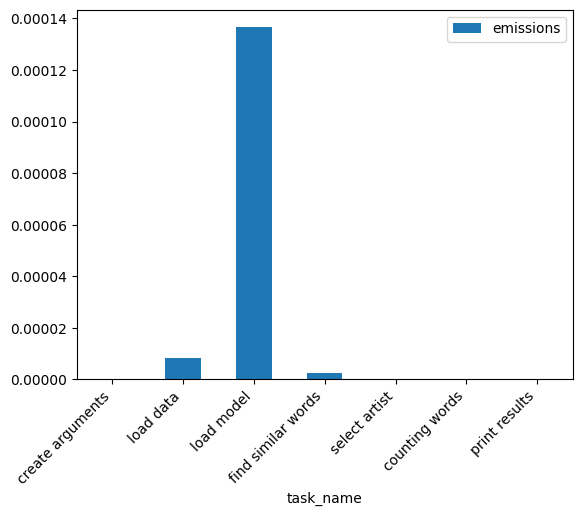

<Figure size 640x480 with 0 Axes>

In [13]:
# creating a visualization of the emissions

assignment3.plot(x="task_name", y="emissions", kind="bar") 
plt.xticks(rotation=45, ha="right")

plt.savefig('../output/Assignment3_emissions.png') # save output
plt.show()
plt.clf()

##### Discussion of results

While Assignment 3 overall has the lowest emissions, the above plot shows that loading the model is the most intensive task in this script. The model in question is a pretrained model, which does mean that no training is required. The model choice is therefore already one with lower emissions. 

This assignment is already fairly optimized in terms of avoiding unecessary emissions. This might also be because the dataset is limited by both an artist and specific keywords when searching through and counting how many instances of the input word appears.

### Assignment 4

In [22]:
# loading the csv file with emissions for assignment 4

filename4 = os.path.join("../input/emissions_base_f23c7b75-84ee-4fb2-b4da-eeaa8a910bc3.csv")
assignment4 = pd.read_csv(filename4)
assignment4[["task_name", "emissions"]]

,task_name,emissions
0,load model,1.895709e-04
1,load data,3.336179e-07
2,sentiment analysis,2.355066e-02
3,fix labels,1.157086e-07
4,update dataframe,7.836194e-07
5,plot distribution of emotion labels for every ...,1.495048e-06
6,plot emotion freq across seasons,1.136021e-05


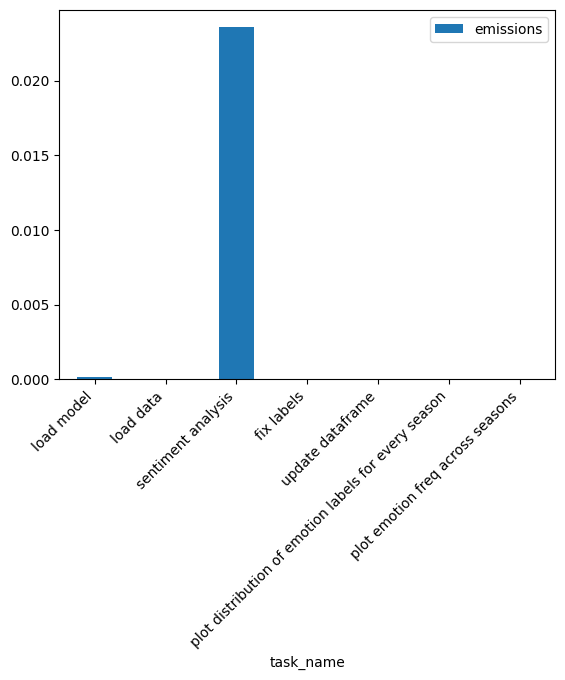

<Figure size 640x480 with 0 Axes>

In [15]:
# creating a visualization of the emissions

assignment4.plot(x="task_name", y="emissions", kind="bar") 
plt.xticks(rotation=45, ha="right")

plt.savefig('../output/Assignment4_emissions.png') # save output
plt.show()
plt.clf()

##### Discussion of results

As previously mentioned, Assignment 4 generates more CO₂eq than any other assignment. As shown by the visualization above, this is due to the sentiment analysis.

The ```sentiment analysis``` task performs a sentiment analysis of the entire Game of Thrones manuscript, which is a task that requires a lot of time and resources as it loops over every line and provides an emotion label. Therefore, it comes as no surprise that it generates the most emissions. 
In order to lower this number, one suggestion would be to reduce the dataset. Instead of looking at every single line of dialogue, you could focus on certain seasons, scenes, or characters and only run the sentiment analysis for those lines. 
Alternatively, if the overall emotion is still of interest, you could instead cut out any line that falls below a certain amount of characters. This would skip lines with very simple dialogue, yes/no answers, or names being called, which are usually analyzed as being neutral anyways. This would skew the amount of neutral labels being used, but you might question if these short replies are even being classified correctly in the first place, since they contain very limited information for the model to go on.